###                                   Visa Mohit

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

import os
print os.listdir(".")


['.ipynb_checkpoints', 'h1b_kaggle.csv', 'h1b_kaggle.csv.zip', 'Mohit Visa.ipynb', 'Visa .ipynb']


In [47]:
df=pd.read_table('h1b_kaggle.csv', sep=",")

In [48]:
print df.shape
print df.info()

(3002458, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB
None


In [49]:
df1=df.head(1000)

In [50]:
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [52]:
States=[]
for i in df.WORKSITE:
    state=i.split(", ")[1]
    States.append(state)


In [53]:
S1=pd.DataFrame(States, columns=["States"])
df["States"]=S1
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,States
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,MICHIGAN
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,TEXAS
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,NEW JERSEY
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,COLORADO
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,MISSOURI


In [54]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

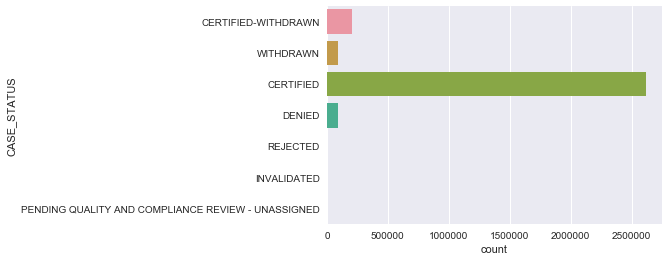

In [55]:
sns.countplot(y=df.CASE_STATUS, data=df)

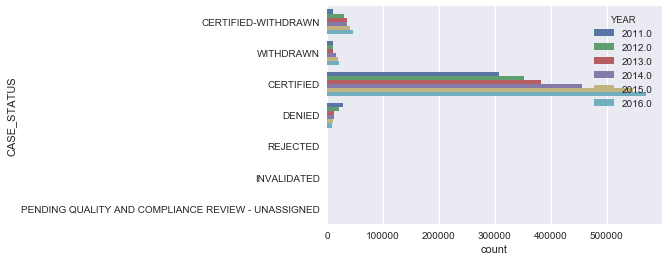

In [56]:
sns.countplot(y=df.CASE_STATUS, hue=df.YEAR, data=df)

In [57]:
pd.crosstab(df.CASE_STATUS, df.YEAR, margins=True).style.background_gradient(cmap='summer_r')

from 2011 to 2016.no  of application got increased several times and corrospoing approvals and rejection also got increased.
max nos of approvals are on 2016

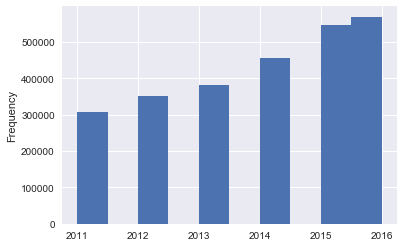

In [58]:
df[df.CASE_STATUS=="CERTIFIED"]["YEAR"].plot.hist()

In [30]:
##sns.factorplot(df.CASE_STATUS, hue=df.YEAR, data=df)

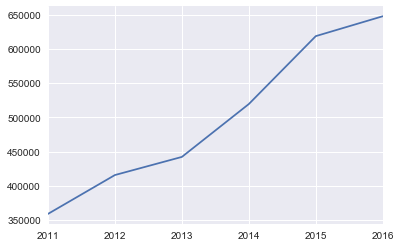

In [59]:
df.YEAR.value_counts().sort_values().plot()

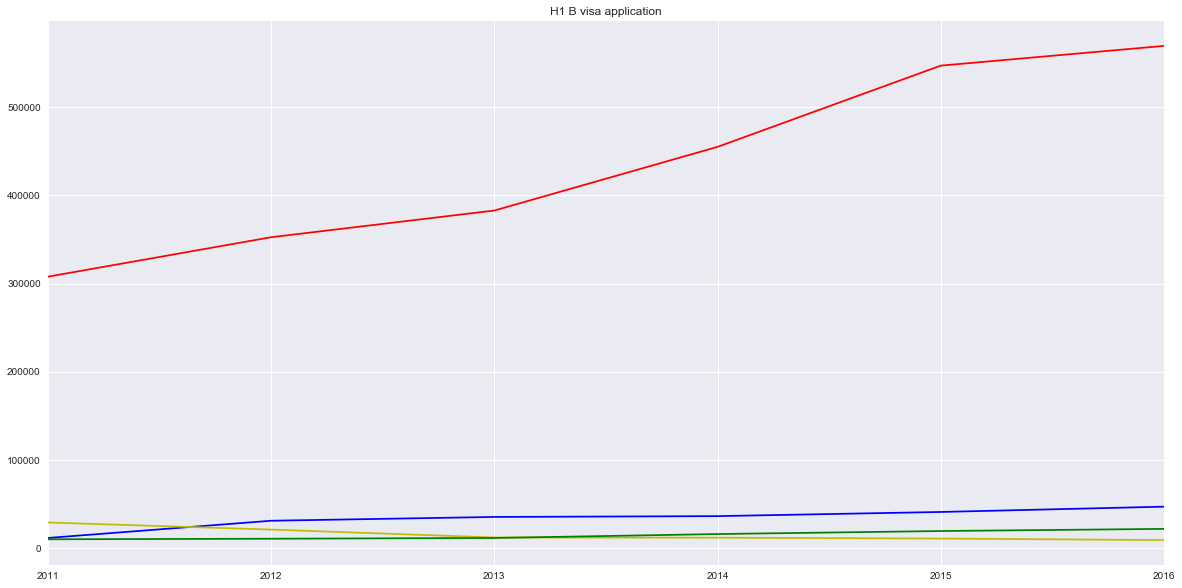

In [61]:
fig=df[df.CASE_STATUS=="CERTIFIED"].YEAR.value_counts().sort_values().plot(color="r", label="CERTIFIED")
df[df.CASE_STATUS=="CERTIFIED-WITHDRAWN"].YEAR.value_counts().sort_values().plot(color="b", label="Withdrawn-CERTIFIED",ax=fig)
df[df.CASE_STATUS=="DENIED"].YEAR.value_counts().sort_values().plot(color="y", label="Denied",ax=fig)
df[df.CASE_STATUS=="WITHDRAWN"].YEAR.value_counts().sort_values().plot(color="g", label="Withdrawn", ax=fig)

fig.set_title("H1 B visa application")
fig=plt.gcf()
fig.set_size_inches(20,10)


In [62]:
##sns.countplot(x=df.YEAR, hue=df.WORKSITE)

In [63]:
df1=df[(df.CASE_STATUS=="CERTIFIED")|(df.CASE_STATUS=="CERTIFIED-WITHDRAWN")]
print df1.shape
print df1.CASE_STATUS.value_counts()

(2818282, 12)
CERTIFIED              2615623
CERTIFIED-WITHDRAWN     202659
Name: CASE_STATUS, dtype: int64


In [64]:
pd.crosstab(df1.CASE_STATUS, df1.YEAR).style.background_gradient(cmap='summer_r')

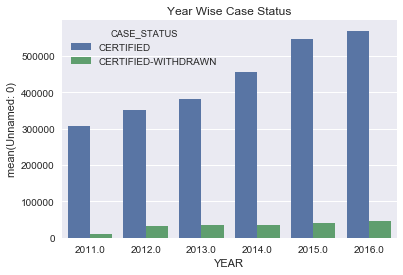

In [65]:
cer_den=df1.groupby([df1.CASE_STATUS, df1.YEAR])["Unnamed: 0"].count().reset_index()
sns.barplot(cer_den.YEAR, cer_den["Unnamed: 0"], hue=cer_den.CASE_STATUS)
plt.title("Year Wise Case Status")

Everyone says that USA is the largest hotspot for jobs, and with the growing number of startups, the demand for talented people is also increasing. It is evident from the above graph that the number of certifies applications are growing, whereas the number of denied applications are diminshing.

In [66]:
appli=df.groupby(['lat','lon'])['Unnamed: 0'].count().reset_index()
appli.columns=[['lat','lon','applications']]
appli.applications.sort_values(ascending=False)[:52]

1430    194360
162      83889
836      62821
405      52194
1838     51497
782      50367
785      35136
288      31628
2001     31471
2390     30667
644      30269
787      29600
293      29392
282      28881
783      28167
1441     27082
197      26865
2385     26859
501      26517
1151     24161
968      22516
356      21521
2386     21306
323      20742
512      18288
394      17052
796      16686
19       16607
1157     16574
1325     15742
93       15562
1345     15245
313      14361
809      14360
781      13837
2307     13751
808      13337
1299     13198
917      13175
1053     12268
1350     12138
1406     11600
2011     11542
795      11097
140      11038
201      11014
1110     10746
1117     10322
1809     10039
1332      9881
985       9786
1019      9679
Name: applications, dtype: int64

### Inspiration 1: Which employers file the most petitions each year?

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 12 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
States                object
dtypes: float64(4), int64(1), object(7)
memory usage: 274.9+ MB


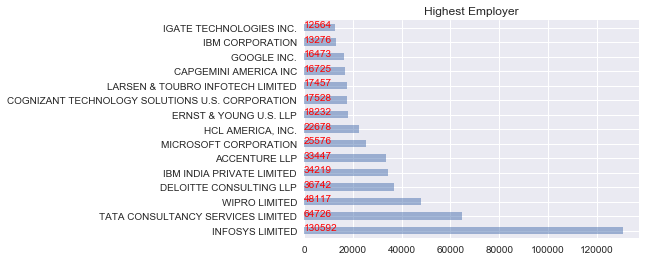

In [68]:
ax=df.EMPLOYER_NAME.value_counts().sort_values(ascending=False)[:15].plot.barh(alpha=0.5)
for i,v in enumerate(df.EMPLOYER_NAME.value_counts().sort_values(ascending=False)[:15]):
    ax.text(0.2,i,v,color='r')
plt.title("Highest Employer")

I wasn't at all surprised to see the Top 3 employeers..:D. Anyone from India will agree that the Top 3 emoloyeers are the biggest recruiters in India, and thus they have the highest outsourcing powers. Lets check the number of certified and denied applications for these Top employeers.

In [69]:
df2=df.EMPLOYER_NAME.value_counts().sort_values(ascending=False)[:15]
df[(df.CASE_STATUS=="CERTIFIED")|(df.CASE_STATUS=="CERTIFIED-WITHDRAWN")].isin(df2)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,States
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False


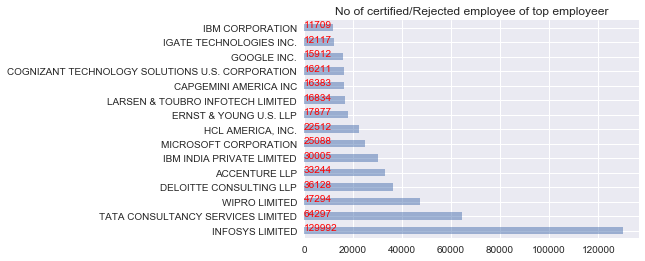

In [73]:
df3=df[df.EMPLOYER_NAME.isin(df2.index)]
df4=df3[(df3.CASE_STATUS=="CERTIFIED")|(df3.CASE_STATUS=="CERTIFIED-WITHDRAWN")]
ax=df4.EMPLOYER_NAME.value_counts().sort_values(ascending=False).plot.barh(alpha = 0.5)
for i,v in enumerate(df4.EMPLOYER_NAME.value_counts().sort_values(ascending=False)):
   ax.text(0.1,i,v,color='r') 
plt.title("No of certified/Rejected employee of top employeer")

In [77]:
comp_den=df[df.CASE_STATUS.isin(["CERTIFIED","DENIED"])]
comp_den=comp_den[comp_den.EMPLOYER_NAME.isin(comp_den.EMPLOYER_NAME.value_counts().sort_values(ascending=False)[:10].index)]

comp_den1=comp_den.groupby(["EMPLOYER_NAME","CASE_STATUS"])["JOB_TITLE"].count().reset_index()
comp_den=comp_den.pivot('EMPLOYER_NAME','CASE_STATUS','JOB_TITLE')
#plt.scatter("CERTIFIED","DENIED", data=comp_den1)
#plt.scatter('CERTIFIED','DENIED',data=comp_den,s=comp_den['CERTIFIED']*0.03)


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
comp_den=df[(df.CASE_STATUS=="CERTIFIED")|(df.CASE_STATUS=='DENIED')]
comp_den=comp_den[comp_den.EMPLOYER_NAME.isin(comp_den.groupby(["EMPLOYER_NAME"])["JOB_TITLE"].count().sort_values(ascending=False)[:15].index)]
#comp_den


In [ ]:
comp_den=comp_den.groupby(['EMPLOYER_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
comp_den=comp_den.pivot("EMPLOYER_NAME","CASE_STATUS","JOB_TITLE")

In [ ]:
plt.figure(figsize=(25,15))
plt.scatter('CERTIFIED','DENIED',data=comp_den,s=comp_den.CERTIFIED*.03)
for i in range(comp_den.shape[0]):
    plt.text(comp_den.CERTIFIED.values[i], comp_den.DENIED.values[i], s=comp_den.index[i], color='r', weight='bold')

plt.title('Status Certified vs Denied',size=30)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')

It is good to see that even with such high number of applications, Infosys has very few cases of Denied visa's. But the above graph has employeers with highest applications ,and it is possible that employeers with lesser applications have higher Certification rates.Lets check which all employeers have the highest Certification rates.

In [43]:
emp_rate1=df[df['CASE_STATUS']=='CERTIFIED']
emp_rate1=emp_rate1.groupby(['EMPLOYER_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
emp_rate2=df[df['CASE_STATUS']=='DENIED']
emp_rate2=emp_rate2.groupby(['EMPLOYER_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
aa1=emp_rate2.sort_values('YEAR',ascending=False)[:100]
aa2=emp_rate1.sort_values('YEAR',ascending=False)[:100]
aa3=aa2.merge(aa1,left_on='EMPLOYER_NAME',right_on='EMPLOYER_NAME',how='left').dropna()
aa3['Acceptance_rate']=aa3['YEAR_x']/(aa3['YEAR_x']+aa3['YEAR_y'])

In [44]:
aa3.sort_values('Acceptance_rate',ascending=False)[['EMPLOYER_NAME','Acceptance_rate']][:15]

,EMPLOYER_NAME,Acceptance_rate
6,MICROSOFT CORPORATION,0.998212
1,TATA CONSULTANCY SERVICES LIMITED,0.998120
4,ACCENTURE LLP,0.997817
0,INFOSYS LIMITED,0.997505
7,"HCL AMERICA, INC.",0.995701
9,LARSEN & TOUBRO INFOTECH LIMITED,0.995695
2,WIPRO LIMITED,0.995352
10,CAPGEMINI AMERICA INC,0.995322
23,UST GLOBAL INC.,0.993713
26,"HEXAWARE TECHNOLOGIES, INC.",0.992824


Microsoft has the highest acceptance or certification rate.

### Employeer Applications by Year

In [169]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,States
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,MICHIGAN
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,TEXAS
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,NEW JERSEY
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,COLORADO
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,MISSOURI


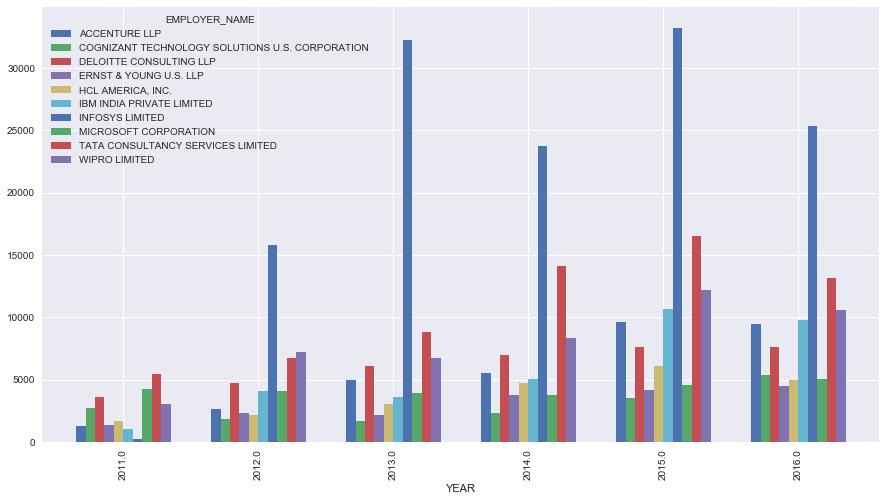

In [182]:
emp_year=df[df.EMPLOYER_NAME.isin(df.EMPLOYER_NAME.value_counts()[:10].index)]
emp_year=emp_year.groupby(['EMPLOYER_NAME','YEAR'])['CASE_STATUS'].count().reset_index()
emp_year.pivot('YEAR','EMPLOYER_NAME','CASE_STATUS').plot.bar(width=0.7)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()



### Wage Distribution

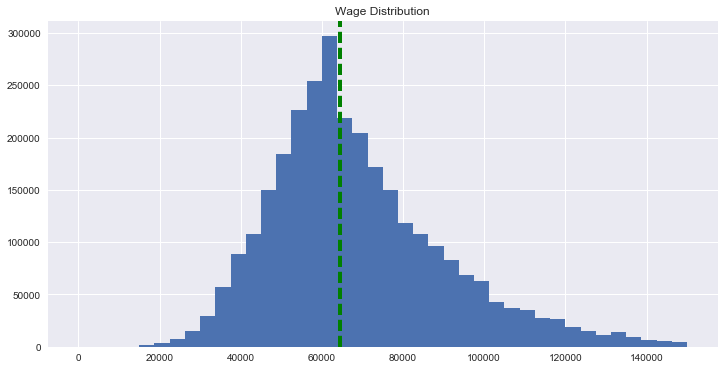

In [187]:
plt.figure(figsize=(12,6))
df[df['PREVAILING_WAGE']<150000].PREVAILING_WAGE.hist(bins=40)
plt.axvline(df[df['PREVAILING_WAGE']<=150000].PREVAILING_WAGE.median(), color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

There are many outliers in the prevailing wages, with values ranging up to billion dollars. The distribution is skewed towards the right. These are likely to bias the mean estimate. Thus we checked the median wage, which gives a better estimate as compared to the mean wage. Lets now split the wages by their CASE_STATUS.

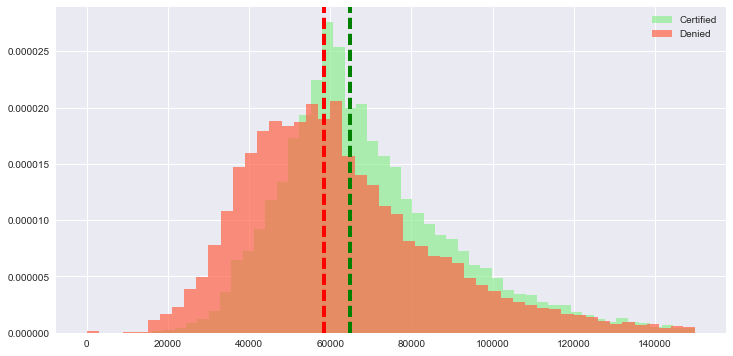

In [191]:
plt.figure(figsize=(12,6))
df[(df['PREVAILING_WAGE']<150000)&(df['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.hist(bins=50, color="lightgreen", alpha=0.7, label='Certified', normed=True)
plt.axvline(df[(df['PREVAILING_WAGE']<=150000)&(df['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.median(), color='green', linestyle='dashed', linewidth=4)
df[(df['PREVAILING_WAGE']<150000)&(df['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.hist(bins=50,color="tomato", alpha=0.7, label='Denied', normed=True)
plt.axvline(df[(df['PREVAILING_WAGE']<=150000)&(df['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.median(), color='red', linestyle='dashed', linewidth=4)
plt.legend()

The median wage for Denied Cases is lower than that of Certified Cases. This might be a reason for Application denial, the applications might have a lower wage than required.

### Lowest Median Salaries by Top Employeers
lets check which employeer with high applications offers the lowest median wages.

In [199]:
high_emp=df['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:20].to_frame()
df[df['EMPLOYER_NAME'].isin(high_emp.index)&(df['PREVAILING_WAGE']<=150000)].groupby(['EMPLOYER_NAME'])['PREVAILING_WAGE'].median().to_frame().sort_values(by='PREVAILING_WAGE')

,PREVAILING_WAGE
EMPLOYER_NAME,
DELOITTE & TOUCHE LLP,55474.0
LARSEN & TOUBRO INFOTECH LIMITED,56597.0
TATA CONSULTANCY SERVICES LIMITED,61381.0
ERNST & YOUNG U.S. LLP,66435.0
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,67038.0
IGATE TECHNOLOGIES INC.,67350.0
INFOSYS LIMITED,67371.0
IBM INDIA PRIVATE LIMITED,67600.0
WIPRO LIMITED,68141.0


### Inspiration 2: Is the number of petitions with Data Engineer job title increasing over time? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 12 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
States                object
dtypes: float64(4), int64(1), object(7)
memory usage: 274.9+ MB


In [202]:
data_peeps=df.dropna(subset=['JOB_TITLE'])
data_peeps=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA')]
data_scientists=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA SCIENTIST')]
data_analyst=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ANALYST')]
data_eng=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ENG')]

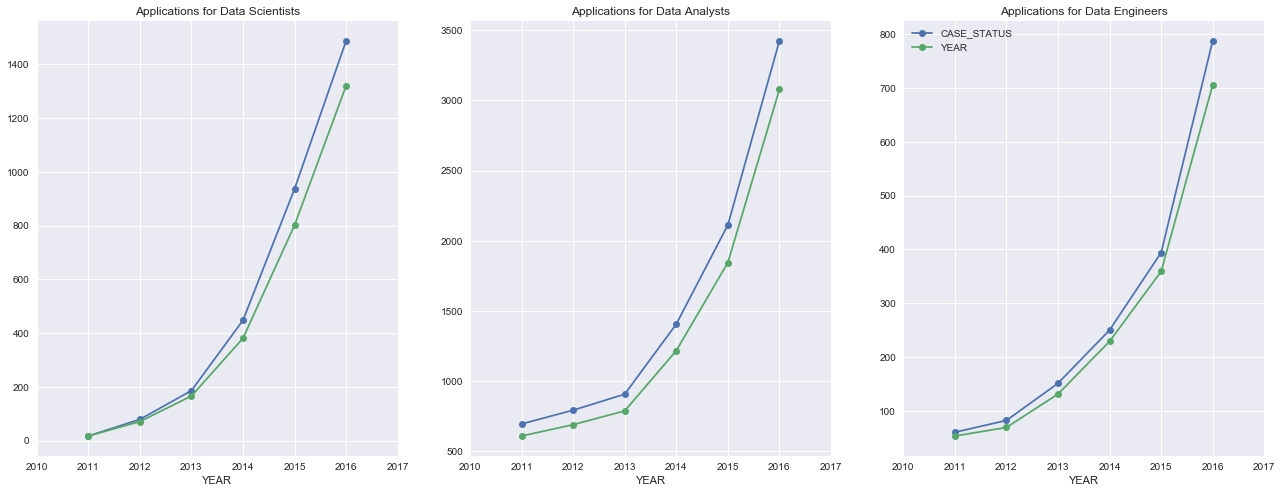

In [208]:
f,ax=plt.subplots(1,3,figsize=(22,8))
data_scientists.groupby('YEAR')['CASE_STATUS'].count().plot(ax=ax[0],marker='o')
data_analyst.groupby('YEAR')['CASE_STATUS'].count().plot(ax=ax[1],marker='o')
data_eng.groupby('YEAR')['CASE_STATUS'].count().plot(ax=ax[2],marker='o')
data_scientists[data_scientists['CASE_STATUS']=='CERTIFIED'].YEAR.value_counts().plot(marker='o',ax=ax[0])
data_analyst[data_analyst['CASE_STATUS']=='CERTIFIED'].YEAR.value_counts().plot(marker='o',ax=ax[1])
data_eng[data_eng['CASE_STATUS']=='CERTIFIED'].YEAR.value_counts().plot(marker='o',ax=ax[2])
for i,j in zip([0,1,2],['Applications for Data Scientists','Applications for Data Analysts','Applications for Data Engineers']):
    ax[i].set_title(j)
for i in [0,1,2]:
    ax[i].set_xlim([2010,2017])
    
plt.legend()

It is indeed True. The number of applications related to Data Jobs are increasing tremendously. Also the red line denotes the number of Certified Applications. The number of applications are almost going up by almost 100%. As mentioned earlier that USA is a hotspot for jobs, this graph will probably keep growing at a similar rate.

### Salary for Data Related Jobs

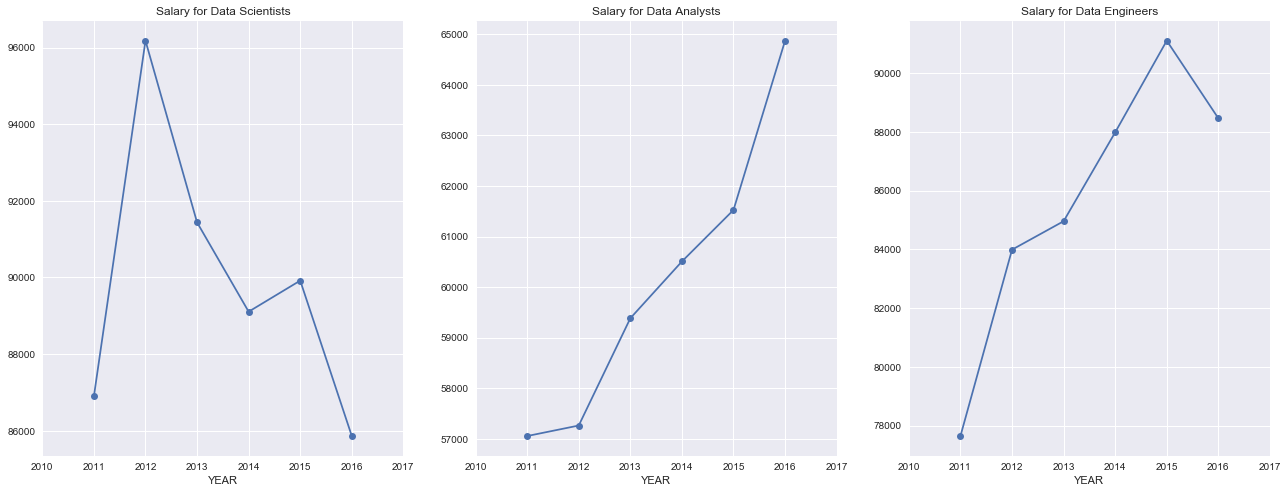

In [210]:
f,ax=plt.subplots(1,3,figsize=(22,8))
data_scientists[data_scientists['PREVAILING_WAGE']<150000].groupby(['YEAR'])['PREVAILING_WAGE'].median().plot(ax=ax[0],marker='o')
data_analyst[data_analyst['PREVAILING_WAGE']<150000].groupby(['YEAR'])['PREVAILING_WAGE'].median().plot(ax=ax[1],marker='o')
data_eng[data_eng['PREVAILING_WAGE']<150000].groupby(['YEAR'])['PREVAILING_WAGE'].median().plot(ax=ax[2],marker='o')
for i,j in zip([0,1,2],['Salary for Data Scientists','Salary for Data Analysts','Salary for Data Engineers']):
    ax[i].set_title(j)
for i in [0,1,2]:
    ax[i].set_xlim([2010,2017])
plt.show()

The median wage we saw was around 65k$ . Thus Data Scientists and Data Engineers enjoy good salary benefits, however it is not true for Data Analysts. The salary for Data Scientists has dropped in the past few years, but still above median wage. The wage for Data Engineers has increased tremendously over the years.

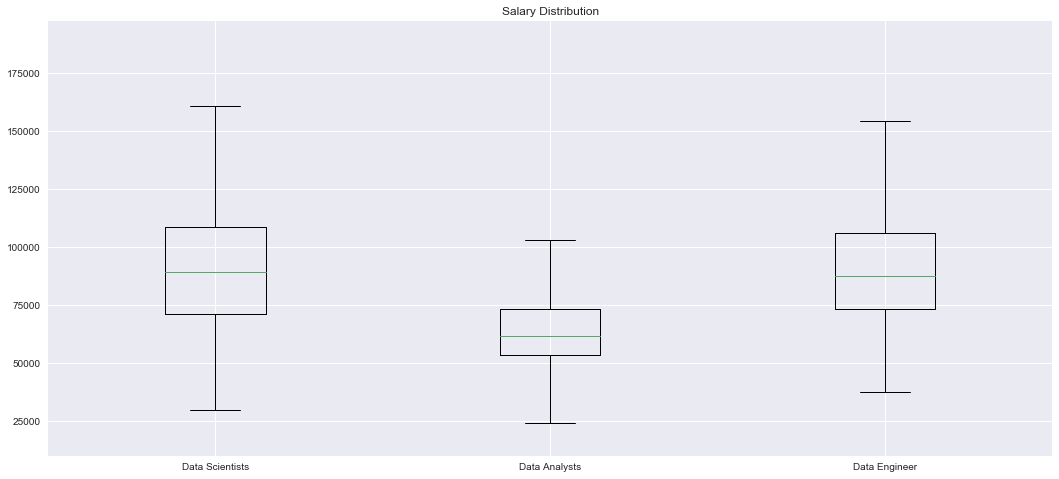

In [211]:
f,ax=plt.subplots(figsize=(18,8))
plt.boxplot([data_scientists[data_scientists['PREVAILING_WAGE']<200000].PREVAILING_WAGE,data_analyst[data_analyst['PREVAILING_WAGE']<200000].PREVAILING_WAGE,data_eng[data_eng['PREVAILING_WAGE']<200000].PREVAILING_WAGE])
ax.set_xticklabels(['Data Scientists','Data Analysts','Data Engineer'])
ax.set_title('Salary Distribution')
plt.show()

### Highest Paying Employeers

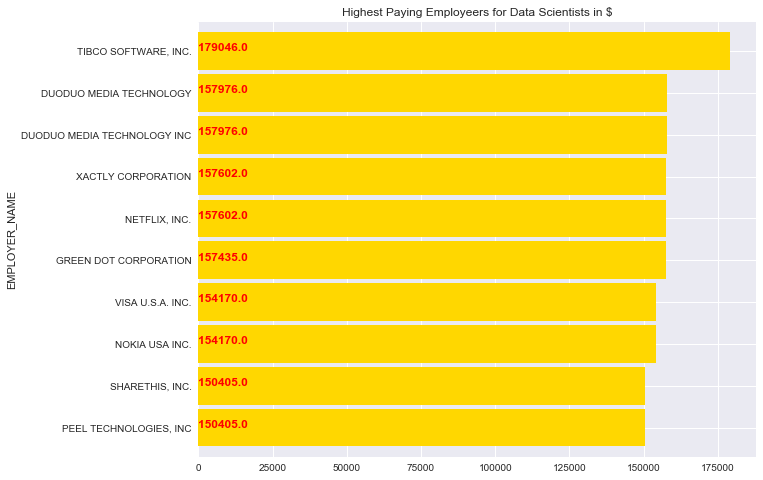

In [213]:
plt.figure(figsize=(10,8))
ax=data_scientists.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].median().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#ffd700')
for i, v in enumerate(data_scientists.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].median().sort_values(ascending=False)[:10].values): 
    ax.text(.8, i, v,fontsize=12,color='r',weight='bold')
plt.title('Highest Paying Employeers for Data Scientists in $')
fig=plt.gca()
fig.invert_yaxis()

### Denied Cases By States

In [78]:
def2=df[(df['CASE_STATUS']=='DENIED')&(df.state.isin(df[df['CASE_STATUS']=='DENIED'].state.value_counts()[:10].index))].groupby(['YEAR','state'])['Unnamed: 0'].count().reset_index()
fig=plt.figure(figsize=(20,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    plt.scatter('state','Unnamed: 0',data=def2[def2['YEAR']==Year],s=def2['Unnamed: 0'])
    plt.title('Year: '+str(Year),size=30)
    plt.xlabel('CERTIFIED')
    plt.xlabel('DENIED')
    plt.ylim([0,6500])
ani = animation.FuncAnimation(fig,animate,list(def2.YEAR.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

AttributeError: 'DataFrame' object has no attribute 'state'

### Inspiration 3: Which industry has the most number of Data Scientist positions?

In [81]:
plt.figure(figsize=(10,8))
data_coun=data_scientists['EMPLOYER_NAME'].value_counts()[:10]
ax=sns.barplot(y=data_coun.index,x=data_coun.values,palette=sns.color_palette('inferno',10))
for i, v in enumerate(data_coun.values): 
    ax.text(.5, i, v,fontsize=15,color='white',weight='bold')
plt.title('Companies Hiring Data Scientists')
plt.show()

NameError: name 'DS' is not defined

Since we don not have any column denoting the type of industry, we check the company hiring the highest number of data scientists. Seeing the Top 10 companies, we can say that majorly the Tech Industry has been hiring Data Scientists.

### Inspiration 4: Which part of the US has the most Hardware Engineer jobs?

In [ ]:
hardware=df.dropna(subset=['JOB_TITLE'])
hardware=hardware[hardware['JOB_TITLE'].str.contains('HARDWARE ENGINEER')]
hardware=hardware.groupby(['lat','lon','State'])['Unnamed: 0'].count().reset_index()
locate=hardware[['lat','lon']]
count=hardware['Unnamed: 0']
state=hardware['State']
def color_producer(count):
    if count < 10:
        return 'red'
    elif 10 <= count < 100:
        return 'orange'
    else:
        return 'green'
map1 = folium.Map(location=[39.50, -98.35],tiles='CartoDB dark_matter',zoom_start=3.5)
for point in hardware.index:
    folium.CircleMarker(list(locate.loc[point].values),popup='<b>Number of Applications: </b>'+str(count.loc[point])+"<br><b> State: "+str(state.loc[point]),radius=count.loc[point]*0.01,color=color_producer(count.loc[point]),fill_color=color_producer(count.loc[point]),fill=True).add_to(map1)
map1

Unlike the Software jobs that are spread out in the eastern and the western coast, Hardware Engineering jobs are mainly focused on the west coast, specially California.

I would stop my analysis here, but there is still lot many things that can be done with this dataset. Suggestions and Feedback are always appreciated.

Thank You